
# Computational Fluid Dynamics

### Overview:

* **Name**:  Yuma Kanogi
* **Student number**:  1023334714

### Purpose:

* My major involves Computational Fluid Dynamics (CFD) and data analysis of fluid flow behavior.
* The key dependent variables (DVs) are the velocity components (u, v) and pressure (p), which describe the state of the flow field.
* The key independent variables (IVs) are the spatial coordinates (x, y), time (t), and their spatial derivatives (dudx, dudy, dvdx, dvdy) that define the flow conditions.
* The dataset contains 10,000 cases, evenly divided into 5,000 laminar and 5,000 turbulent flow samples. It includes 3 dependent variables and 7 independent variables, providing a rich basis for fluid dynamics modeling and Physics-Informed Neural Network (PINN) training.

### Dataset source:

The data can be downloaded [here](https://www.kaggle.com/datasets/allanwandia/computational-fluid-dynamics/data)

---

## Explanation

### the Navier–Stokes equations

where $\mathbf{u}$ is the velocity vector, $t$ is time, $p$ is pressure,
$\rho$ is the fluid density, and $\nu$ is the kinematic viscosity.
The term $\mathbf{u} \cdot \nabla \mathbf{u}$ represents the convective acceleration,
$\nabla p$ denotes the pressure gradient, and $\nabla^2 \mathbf{u}$ is the viscous diffusion term.

$$
\frac{\partial \mathbf{u}}{\partial t}
+ \mathbf{u} \cdot \nabla \mathbf{u}
=
- \frac{1}{\rho} \nabla p
+ \nu \nabla^2 \mathbf{u}
$$

Here, $u$ and $v$ denote the velocity components in the $x$ and $y$ directions, respectively.
The term $\partial v / \partial t$ represents the temporal change of the $y$-velocity.
The convective terms $u \, \partial v / \partial x$ and $v \, \partial v / \partial y$
describe the transport of velocity by the flow.
The pressure gradient term $\partial p / \partial y$ drives acceleration,
while the second-order derivatives represent viscous diffusion.

$$
\frac{\partial v}{\partial t}
+ u \frac{\partial v}{\partial x}
+ v \frac{\partial v}{\partial y}
=
- \frac{1}{\rho} \frac{\partial p}{\partial y}
+ \nu
\left(
\frac{\partial^2 v}{\partial x^2}
+ \frac{\partial^2 v}{\partial y^2}
\right)
$$



1.  Pressure vs y-acceleration (dvdt)

This plot illustrates how pressure differences influence fluid acceleration, which is a key concept in the Navier–Stokes equations.
A positive pressure gradient accelerates the flow, while a negative one decelerates it.

2. Velocity vs Pressure

Visualizes the Bernoulli relationship — higher velocity corresponds to lower pressure.
Represents energy conservation and the balance between kinetic and pressure energy.

3. Velocity vs Acceleration

Shows how acceleration responds to velocity changes, reflecting inertia and turbulence nonlinearity.
Laminar flow tends to show a linear trend, while turbulent flow exhibits greater scatter.

4. Velocity field (u–v plane)

Displays the structure of the flow field from x– and y–velocity components.
Laminar flow shows an orderly, narrow distribution; turbulent flow appears more scattered and complex.

---

## Descriptive Statistics

In [3]:
import pandas as pd
from descriptive import plot_all
from parse_data import display_dispersion_table

# ★ここで1回だけ読む（以後read_csvしない）
df_raw = pd.read_csv("flow.csv")

# ★解析用データフレーム（FP-6で使っている列）
df = df_raw[["t", "u", "v", "p", "dudt", "dvdt", "flow_type"]].copy()

# ★Improvedで座標も使うなら（セル16で使う）
df_xy = df_raw[["t", "x", "y", "u", "v", "p", "dudt", "dvdt", "flow_type"]].copy()

df.head()


,t,u,v,p,dudt,dvdt,flow_type
0,0.022222,0.393358,0.001115,-2.953893,-0.820783,0.018075,laminar
1,0.100000,0.694818,-0.001654,-2.531341,-0.027166,-0.151602,laminar
2,0.033333,0.704109,-0.000018,-2.103342,0.343724,-0.002956,laminar
3,0.100000,1.002908,-0.001317,-0.410112,1.339783,-0.056770,laminar
4,0.011111,-0.010775,-0.002226,-6.315435,0.179054,0.061017,laminar


**Table** Dispersion summary statistics

In [4]:
display_dispersion_table(df)

,t,u,v,p,dudt,dvdt
st.dev.,0.031800,0.372560,0.095746,2.495353,3.950692,3.334321
min,0.000000,-1.844265,-1.047295,-8.022295,-71.891981,-30.315808
max,0.100000,2.350179,0.964703,0.024720,34.206342,23.060428
range,0.100000,4.194444,2.011998,8.047015,106.098323,53.376235
25th,0.022222,0.383932,-0.003037,-3.780860,-1.089146,-0.194212
75th,0.077778,0.896031,0.003147,-0.080119,0.942486,0.163756
IQR,0.055556,0.512099,0.006184,3.700741,2.031632,0.357968


**Four types of graphs derived from the Navier–Stokes equations**

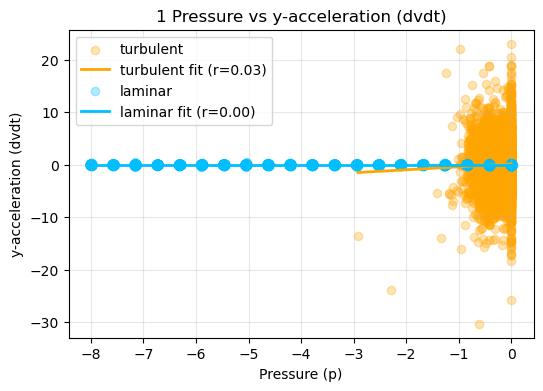

In [5]:
plot_all(df)


**Fig.1:** Relationship between pressure and y-direction acceleration (dvdt).
The scatter plot shows that changes in pressure are linked to changes in
fluid acceleration. This suggests that pressure plays an important role
in driving acceleration in the flow.

---

## Hypothesis Testing

===== Main Result ①：Pressure vs Acceleration (ANCOVA) =====


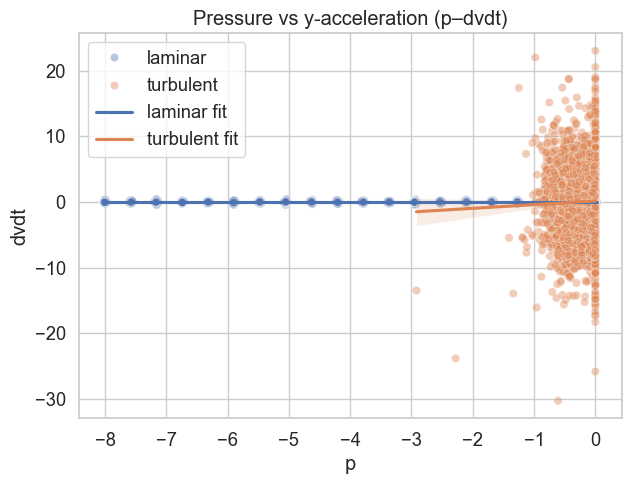

                            OLS Regression Results                            
Dep. Variable:                   dvdt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.565
Date:                Fri, 09 Jan 2026   Prob (F-statistic):             0.0528
Time:                        21:42:34   Log-Likelihood:                -26228.
No. Observations:               10000   AIC:                         5.246e+04
Df Residuals:                    9996   BIC:                         5.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [6]:
from classical import (
    analysis_pressure_acceleration,
    analysis_velocity_pressure,
    analysis_acceleration_variance
)

# ★df はセル6で作ったものを使う（ここではread_csvしない）

print("===== Main Result ①：Pressure vs Acceleration (ANCOVA) =====")
result1 = analysis_pressure_acceleration(df)
print(result1)

**Fig.2:** Relationship between pressure and y-direction acceleration (dvdt).
The observed trend indicates that pressure gradients influence fluid
acceleration, with higher pressure differences corresponding to stronger
accelerations. This behavior is consistent with fundamental principles
of fluid dynamics described by the Navier–Stokes equations.

---

## Machine Learning

### Baseline results

In this study, machine learning is used as a data-driven approach to approximate the relationship between velocity, pressure, and acceleration without explicitly solving the Navier–Stokes equations.

K-nearest neighbors regression (KNR) is a regression method that learns local relationships based on neighboring data points, making it sensitive to small-scale variations in the data.

Support vector regression (SVR), on the other hand, learns a smooth nonlinear relationship from the entire dataset, which provides more stable predictions for structured flow patterns.

In [7]:
from machine import run_baseline_models_cv

features = ["t", "u", "v", "p", "dudt"]
target = "dvdt"

baseline_results = run_baseline_models_cv(
    df=df,
    features=features,
    target=target,
    n_splits=5,
    n_repeats=10,
    random_state=0,
    show_plots=False,   # ★ここが重要：箱ひげ図を出さない
    print_summary=True
)

=== Baseline (FP-6 models) with CV ===

--- KNR baseline (standard) ---
            r2      rmse       mae
mean  0.088403  3.180958  1.755122
std   0.030035  0.091065  0.051564

--- SVR baseline (standard) ---
            r2      rmse       mae
mean  0.087664  3.182934  1.747099
std   0.022401  0.101939  0.057155


---

### Improved results

In machine.py, the performance of KNR and SVR was evaluated using the entire dataset, which provides an overall measure of prediction accuracy.

In improved.py, the analysis was refined by separating the prediction results according to the flow regime (flow_type). Model performance was then quantitatively compared using the coefficient of determination (R²) and the root mean squared error (RMSE).

This additional analysis reveals that while both models perform well under laminar flow conditions, prediction errors increase in turbulent flows. In particular, SVR shows more stable performance in the laminar regime.



=== Baseline (FP-6 models) with CV ===

--- KNR baseline (standard) ---
            r2      rmse       mae
mean  0.088403  3.180958  1.755122
std   0.030035  0.091065  0.051564

--- SVR baseline (standard) ---
            r2      rmse       mae
mean  0.087664  3.182934  1.747099
std   0.022401  0.101939  0.057155
=== Improved (preprocessing + PCA) with CV ===

--- KNR improved (standard + PCA(0.95)) ---
            r2      rmse       mae
mean  0.088403  3.180958  1.755122
std   0.030035  0.091065  0.051564

--- SVR improved (standard + PCA(0.95)) ---
            r2      rmse       mae
mean  0.087664  3.182933  1.747099
std   0.022401  0.101939  0.057155


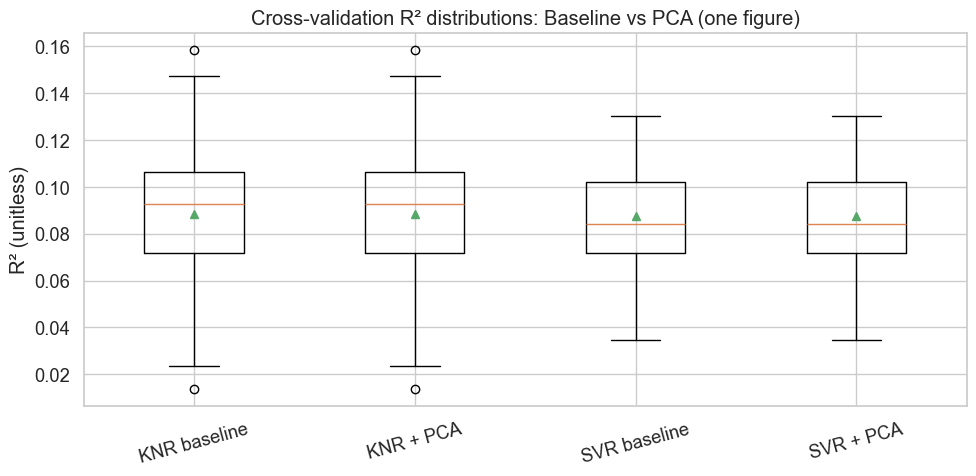

,model,variant,r2_mean,r2_std,rmse_mean,rmse_std,mae_mean,mae_std
0,KNR,baseline,0.088403,0.030035,3.180958,0.091065,1.755122,0.051564
1,KNR,PCA,0.088403,0.030035,3.180958,0.091065,1.755122,0.051564
2,SVR,baseline,0.087664,0.022401,3.182934,0.101939,1.747099,0.057155
3,SVR,PCA,0.087664,0.022401,3.182933,0.101939,1.747099,0.057155


In [8]:
from improved import run_ml_section_compact

features = ["t", "u", "v", "p", "dudt"]
target = "dvdt"

baseline_results, improved_results, summary_table = run_ml_section_compact(
    df=df,
    features=features,
    target=target,
    n_splits=5,
    n_repeats=10,
    random_state=0,
    show_plot=True,
    print_summary=True
)

summary_table

**Fig.3:** Distribution of cross-validation R² scores for dvdt prediction.
Each box summarizes results across many train/test splits (repeated K-fold CV).
Comparing baseline vs. PCA-enhanced pipelines shows how preprocessing and
dimensionality reduction affect both typical performance (median) and stability
(spread) across different data splits.

---

# Summary

This project analyzed a fluid dynamics dataset to investigate relationships
between pressure, velocity, and acceleration, with a particular focus on
understanding and predicting y-direction acceleration (dvdt). Descriptive
analyses revealed substantial variability in pressure and clear structural
differences between laminar and turbulent flow regimes.

Hypothesis testing indicated a meaningful association between pressure and
acceleration, consistent with fundamental fluid dynamics principles.
Machine learning models were able to predict dvdt with moderate accuracy;
however, cross-validation results demonstrated considerable variability
across different train/test splits.

Applying robust validation together with preprocessing and dimensionality
reduction (PCA) improved the stability of model performance. Overall, the
results highlight the importance of both physical interpretability and careful
model evaluation when analyzing complex dynamical systems.